In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration
### Twitter data

In [2]:
db = sqlite3.connect('../vart.db')
c = db.cursor()

In [3]:
query = "SELECT * FROM vart_1h"
data = pd.read_sql_query(query,db)
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by=['date','tag'], inplace=True)
data[data.columns[2:]] = data[data.columns[2:]].apply(pd.to_numeric, errors='coerce')
data.head()

,tag,date,f1,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9
663,btc,2018-03-23 14:00:00,3602,372,2161,706,952,809,653,1638,1081,566,89,2071,1069
664,eth,2018-03-23 14:00:00,1742,89,1228,246,643,541,335,828,680,427,49,1226,425
665,ltc,2018-03-23 14:00:00,379,16,244,45,134,56,36,149,95,31,7,212,119
666,btc,2018-03-23 15:00:00,3603,392,2173,667,997,864,636,1637,1061,530,84,2202,1038
667,eth,2018-03-23 15:00:00,1732,80,1263,211,626,592,353,763,615,455,64,1273,389


In [4]:
data.date

663   2018-03-23 14:00:00
664   2018-03-23 14:00:00
665   2018-03-23 14:00:00
666   2018-03-23 15:00:00
667   2018-03-23 15:00:00
668   2018-03-23 15:00:00
669   2018-03-23 16:00:00
670   2018-03-23 16:00:00
671   2018-03-23 16:00:00
672   2018-03-23 17:00:00
673   2018-03-23 17:00:00
674   2018-03-23 17:00:00
675   2018-03-23 18:00:00
676   2018-03-23 18:00:00
677   2018-03-23 18:00:00
678   2018-03-23 19:00:00
679   2018-03-23 19:00:00
680   2018-03-23 19:00:00
681   2018-03-23 20:00:00
682   2018-03-23 20:00:00
683   2018-03-23 20:00:00
684   2018-03-23 21:00:00
685   2018-03-23 21:00:00
686   2018-03-23 21:00:00
687   2018-03-23 22:00:00
688   2018-03-23 22:00:00
689   2018-03-23 22:00:00
690   2018-03-23 23:00:00
691   2018-03-23 23:00:00
692   2018-03-23 23:00:00
              ...        
633   2018-04-08 01:00:00
634   2018-04-08 01:00:00
635   2018-04-08 01:00:00
636   2018-04-08 02:00:00
637   2018-04-08 02:00:00
638   2018-04-08 02:00:00
639   2018-04-08 03:00:00
640   2018-0

In [5]:
data.dtypes

tag             object
date    datetime64[ns]
f1               int64
f10              int64
f11              int64
f12              int64
f13              int64
f2               int64
f3               int64
f4               int64
f5               int64
f6               int64
f7               int64
f8               int64
f9               int64
dtype: object

* **f1** Volume of tweets
* **f2** Volume of tweets authored by who has more than 1000 and less than 5000 followers
* **f3** Volume of tweets authored by who has more than 5000 followers
* **f4** Volume of retweets
* **f5** Volume of retweets retweeted more than 5 times
* **f6** Volume of retweets authored by who has more than 1000 followers
* **f7** Volume of retweets authored by who has more than 1000 followers and less than 1000 followings
* **f8** Volume of tweets containing links
* **f9** Volume of positive tweets
* **f10** Volume of negative tweets
* **f11** Volume of neutral tweets
* **f12** Volume of positive tweet containing mentions (@)
* **f13** Volume of negative tweets containing mentions (@)

In [6]:
twitter_btc = data[data['tag']=='btc']
twitter_btc.set_index('date', inplace=True) 
twitter_eth = data[data['tag']=='eth']
twitter_eth.set_index('date', inplace=True)
twitter_ltc = data[data['tag']=='ltc']
twitter_ltc.set_index('date', inplace=True)
twitter_btc.head()

,tag,f1,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9
date,,,,,,,,,,,,,,
2018-03-23 14:00:00,btc,3602,372,2161,706,952,809,653,1638,1081,566,89,2071,1069
2018-03-23 15:00:00,btc,3603,392,2173,667,997,864,636,1637,1061,530,84,2202,1038
2018-03-23 16:00:00,btc,3345,335,2026,615,920,790,537,1432,989,517,78,2065,984
2018-03-23 17:00:00,btc,3323,403,2035,585,913,807,542,1492,968,544,104,2083,885
2018-03-23 18:00:00,btc,3282,365,2023,548,913,664,565,1439,886,443,67,2016,894


In [7]:
import matplotlib
matplotlib.rc('font', size=15)
# Color palette
sns.set_style("whitegrid")
blue, = sns.color_palette("muted", 1)

Total nr of tweets is: 1781792
tag
btc    1103652
eth     539304
ltc     138836
Name: f1, dtype: int64


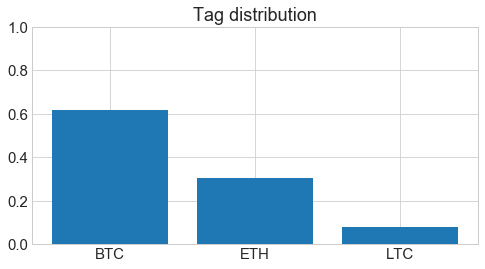

In [8]:
# some data on the number of tweets collected
aggregate_data = data.groupby(['tag']).sum()
# total nr of tweets
tweets_tot = data['f1'].sum()
tweets_tot_bytag = aggregate_data['f1']

print('Total nr of tweets is: {}'.format(tweets_tot))
print(tweets_tot_bytag)

fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(3)
ax.set_ylim([0, 1])
ax.set_title('Tag distribution')
plt.xticks(x, [tag.upper() for tag in tweets_tot_bytag.index])
plt.bar(x, tweets_tot_bytag.values/tweets_tot)
plt.show()
fig.savefig('tag-distribution.png')

In [9]:
# tweets frequency
tdelta = twitter_btc.index[-1] - twitter_btc.index[0]
tweet_freq = tweets_tot_bytag.sum()/tdelta.total_seconds()

print('Data was collected for {}'.format(tdelta))
print('The frequency of tweets was approx {:.2f} per second'.format(tweet_freq))

Data was collected for 15 days 20:00:00
The frequency of tweets was approx 1.30 per second


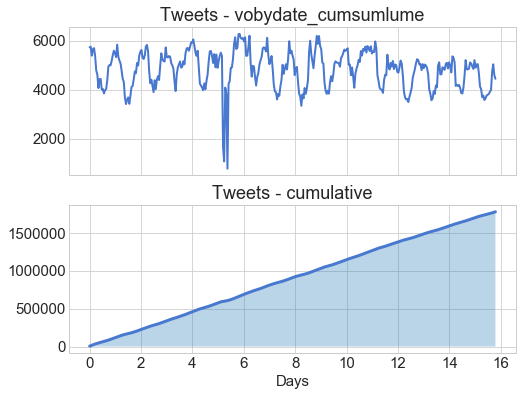

In [10]:
bydate_sum = data.groupby(['date']).sum()
bydate_cumsum = data.groupby(['date']).sum().cumsum()
 
# Create data
tdelta_d = tdelta.total_seconds()/60/60/24
x_days = (np.arange(bydate_cumsum.shape[0])/(bydate_cumsum.shape[0]))*tdelta_d
y = bydate_sum['f1']

# Make the plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(x_days, y, color=blue, lw=2)
ax1.set_title('Tweets - vobydate_cumsumlume')

# Create data
y = bydate_cumsum['f1']

# Make the plot
#fig, ax = plt.subplots(figsize=(10, 5))
ax2.plot(x_days, y, color=blue, lw=3)
ax2.fill_between(x_days, 0, y, alpha=.3)
ax2.set_title('Tweets - cumulative')
ax2.set_xlabel('Days')


plt.show()
fig.savefig('tweets-volume.png')

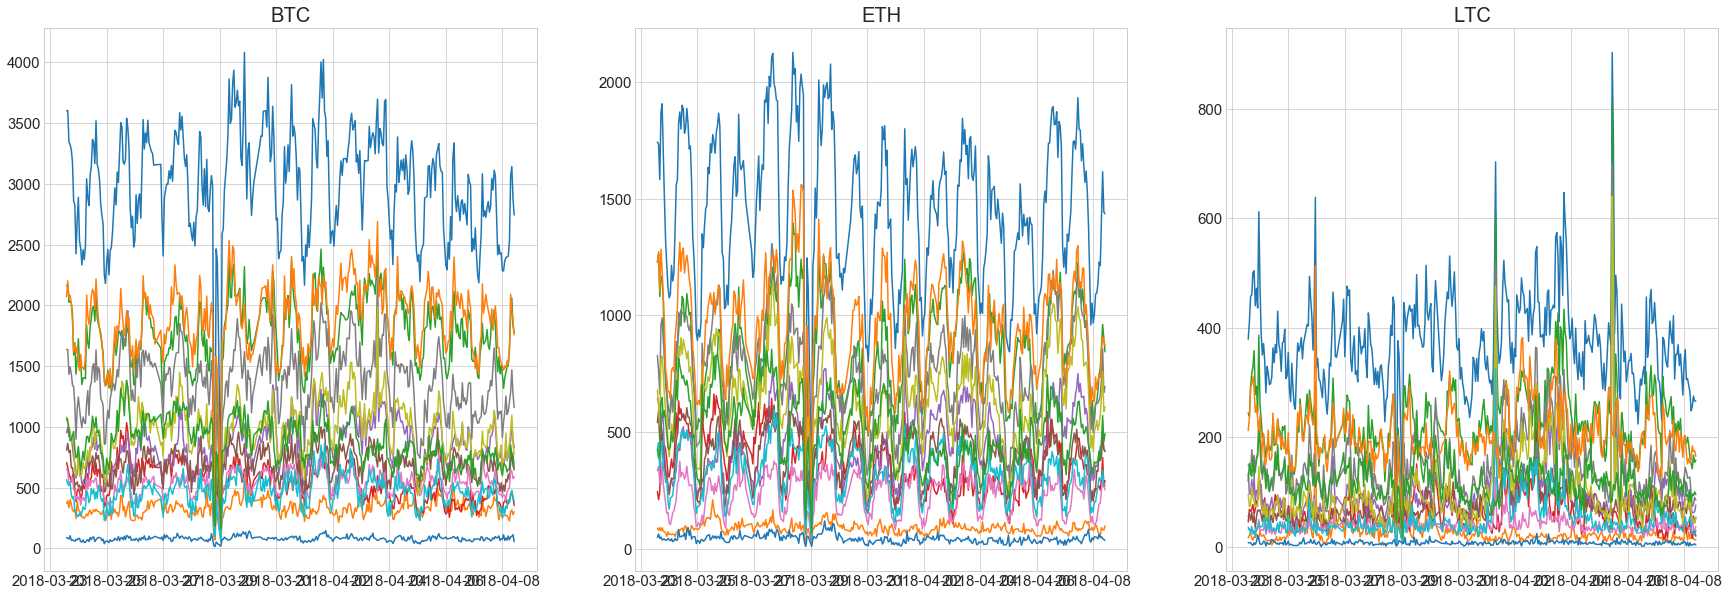

In [11]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}

ax1 = fig.add_subplot(131)
for col in data.columns[2:]:
    ax1.plot(col, data=twitter_btc)
ax1.set_title('BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
for col in data.columns[2:]:
    ax2.plot(col, data=twitter_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
for col in data.columns[2:]:
    ax3.plot(col,data=twitter_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

Obvioulsy features are very correlated between each other, because they are all counts of elements from the same group. For this reason it looks reasonable to divide them by the total volume of tweets of the same time slot (i.e `f1`).

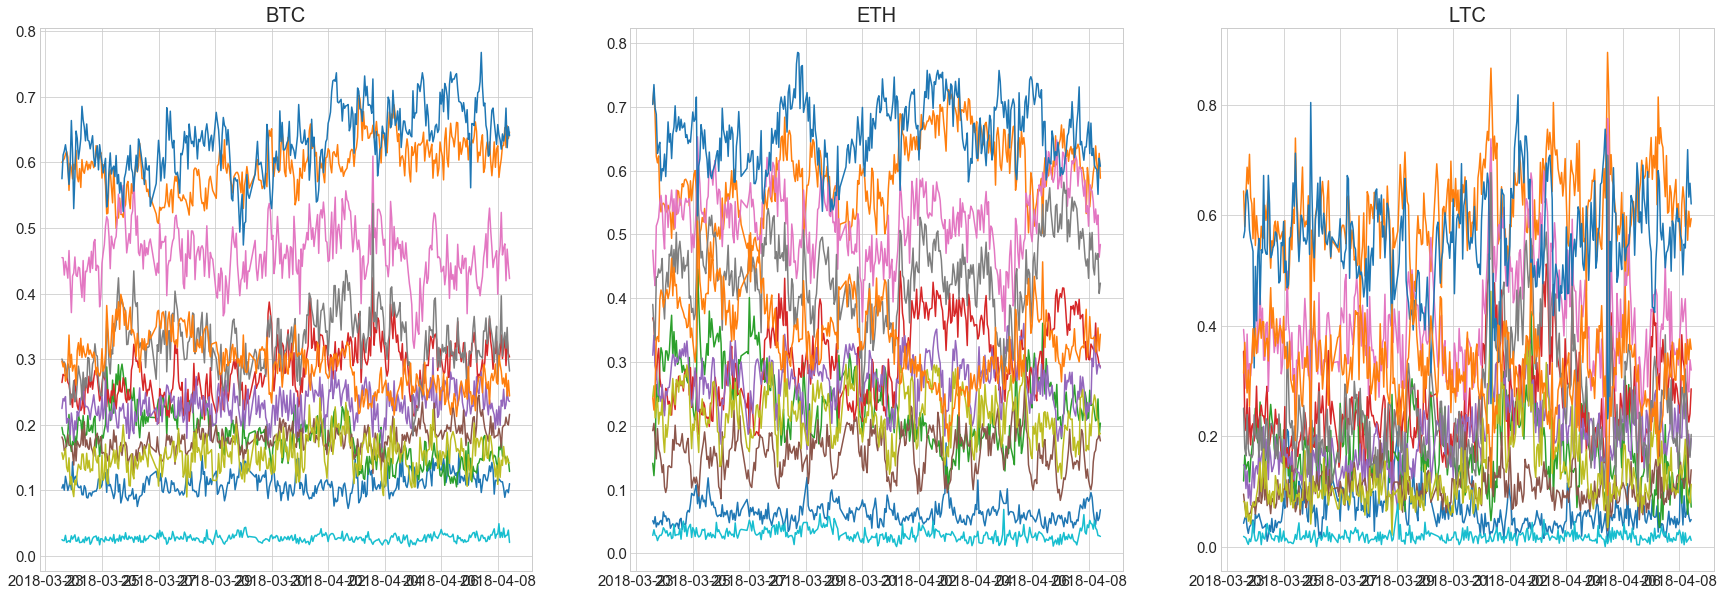

In [12]:
tmp_data = twitter_btc.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_btc['f1'], axis=0)
tmp_data['f1'] = twitter_btc['f1']
tdiv_btc = tmp_data

tmp_data = twitter_eth.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_eth['f1'], axis=0)
tmp_data['f1'] = twitter_eth['f1']
tdiv_eth = tmp_data

tmp_data = twitter_ltc.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_ltc['f1'], axis=0)
tmp_data['f1'] = twitter_ltc['f1']
tdiv_ltc = tmp_data


fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}

ax1 = fig.add_subplot(131)
for col in tmp_data.columns[:-1]:
    ax1.plot(col, data=tdiv_btc)
ax1.set_title('BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
for col in tmp_data.columns[:-1]:
    ax2.plot(col, data=tdiv_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
for col in tmp_data.columns[:-1]:
    ax3.plot(col, data=tdiv_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

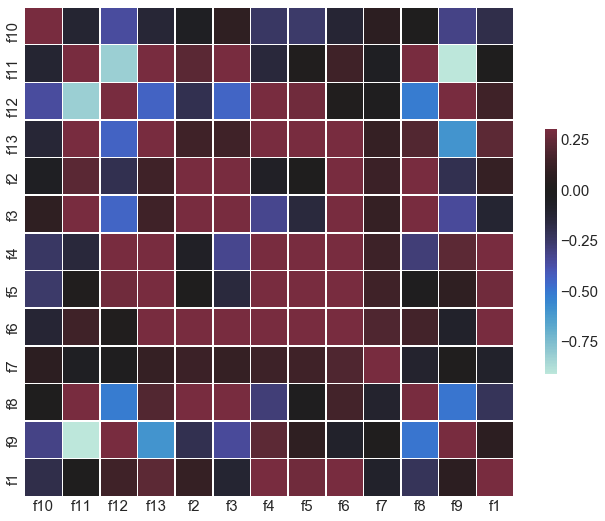

In [13]:
# Compute the correlation matrix
tmp_data = tdiv_btc.reset_index()
corr = tmp_data.loc[1:,].corr()

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Once we apply the division of the features by the total number of tweets the result appear less correlated, which is good.

### Crypto currencies prices

In [14]:
db_cryptos = sqlite3.connect('../cryptos.db')

query = "SELECT * FROM cryptos"
data_cryptos = pd.read_sql_query(query,db_cryptos)
data_cryptos['date'] = pd.to_datetime(data_cryptos['date'])
data_cryptos.set_index('date', inplace=True)
data_cryptos.sort_index(inplace=True)
data_cryptos.head()

,symbol,price,volume,market_cap
date,,,,
2018-03-21 22:40:00,LTC,166.850046,605492.007605,1.010264e+08
2018-03-21 22:40:00,BTC,8894.998570,101859.020921,9.060358e+08
2018-03-21 22:40:00,ETH,559.530318,480512.619368,2.688614e+08
2018-03-21 22:45:00,ETH,560.665817,480794.207013,2.695649e+08
2018-03-21 22:45:00,LTC,167.645108,606796.577486,1.017265e+08


In [15]:
crypto_btc = data_cryptos[data_cryptos['symbol'] == 'BTC']
crypto_btc = crypto_btc.resample('1H').median()
crypto_eth = data_cryptos[data_cryptos['symbol'] == 'ETH']
crypto_eth = crypto_eth.resample('1H').median()
crypto_ltc = data_cryptos[data_cryptos['symbol'] == 'LTC']
crypto_ltc = crypto_ltc.resample('1H').median()

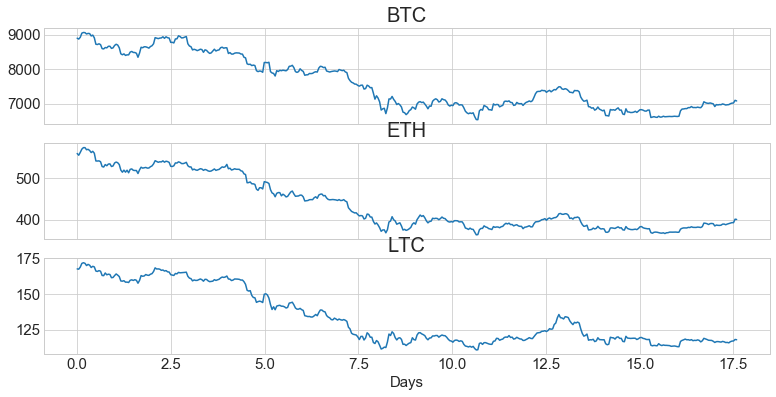

In [16]:
'''
title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}
'''

tdelta = crypto_btc.index[-1] - crypto_btc.index[0]
tdelta_d = tdelta.total_seconds()/60/60/24
x_days = (np.arange(crypto_btc.shape[0])/(crypto_btc.shape[0]))*tdelta_d

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(13, 6))

ax1.plot(x_days, crypto_btc['price'])
ax1.set_title('BTC', fontdict=title_font)

ax2.plot(x_days, crypto_eth['price'])
ax2.set_title('ETH',fontdict=title_font)

ax3.plot(x_days, crypto_ltc['price'])
ax3.set_title('LTC',fontdict=title_font)
ax3.set_xlabel('Days')

plt.show()
fig.savefig('currencies.png')

In [17]:
# price difference between subsequent entries
crypto_btc['diff'] = crypto_btc['price'].diff().dropna()
crypto_eth['diff'] = crypto_eth['price'].diff().dropna()
crypto_ltc['diff'] = crypto_ltc['price'].diff().dropna()

# price % difference between subsequent entries
crypto_btc['var'] = crypto_btc['price'].pct_change().dropna()
crypto_eth['var'] = crypto_eth['price'].pct_change().dropna()
crypto_ltc['var'] = crypto_ltc['price'].pct_change().dropna()

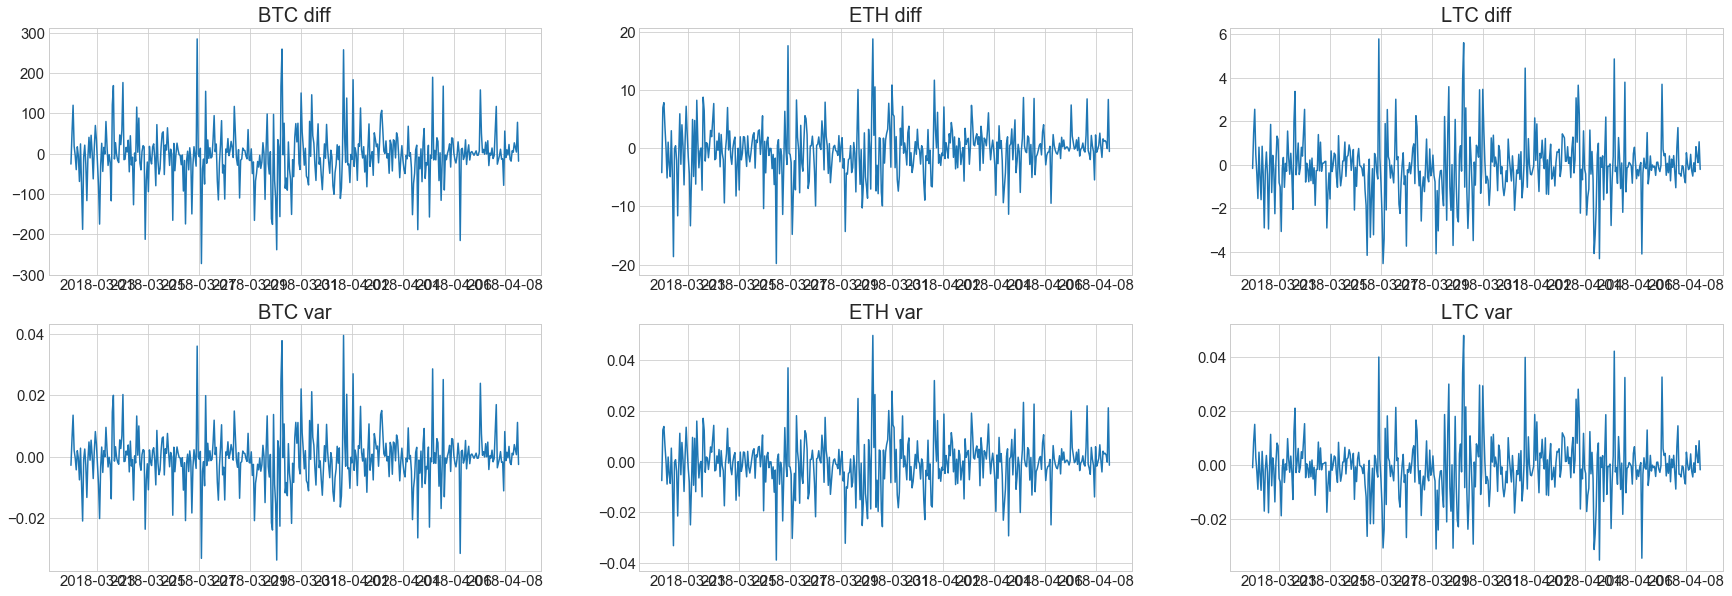

In [18]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}


ax1 = fig.add_subplot(231)
ax1.plot('diff', data=crypto_btc)
ax1.set_title('BTC diff', fontdict=title_font)

ax2 = fig.add_subplot(232)
ax2.plot('diff', data=crypto_eth)
ax2.set_title('ETH diff',fontdict=title_font)

ax3 = fig.add_subplot(233)
ax3.plot('diff', data=crypto_ltc)
ax3.set_title('LTC diff',fontdict=title_font)

ax4 = fig.add_subplot(234)
ax4.plot('var', data=crypto_btc)
ax4.set_title('BTC var', fontdict=title_font)

ax5 = fig.add_subplot(235)
ax5.plot('var', data=crypto_eth)
ax5.set_title('ETH var', fontdict=title_font)

ax6 = fig.add_subplot(236)
ax6.plot('var', data=crypto_ltc)
ax6.set_title('LTC var', fontdict=title_font)

plt.show()

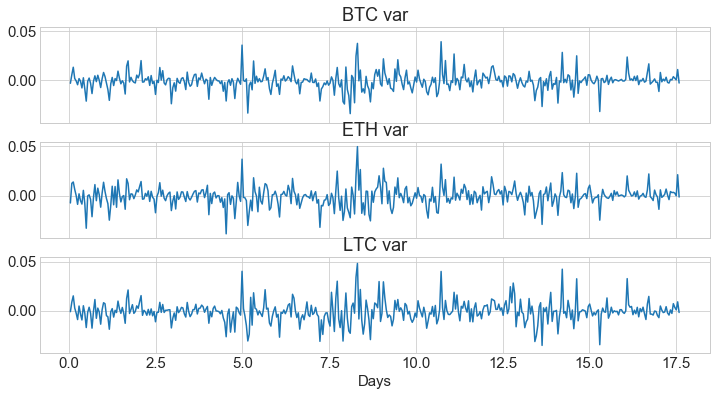

In [19]:
fig, (ax4, ax5, ax6) = plt.subplots(3,1, sharey=True, sharex=True, figsize=(12, 6))

'''
title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}
'''
ax4.plot(x_days, crypto_btc['var'])
ax4.set_title('BTC var')
#ax4.set_ylim([-0.05, 0.05])

ax5.plot(x_days, crypto_eth['var'])
ax5.set_title('ETH var')

ax6.plot(x_days, crypto_ltc['var'])
ax6.set_title('LTC var')
ax6.set_xlabel('Days')

plt.show()
fig.savefig('currencies-var.png')

## Regression and classification

In [20]:
idx = pd.date_range(min(tdiv_btc.index), max(tdiv_btc.index), freq='1H')
filled_btc = tdiv_btc.reindex(idx, method='nearest')

filled_btc.head()

,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9,f1
2018-03-23 14:00:00,0.103276,0.599944,0.196002,0.264298,0.224597,0.181288,0.454747,0.300111,0.157135,0.024708,0.574958,0.296780,3602
2018-03-23 15:00:00,0.108798,0.603109,0.185124,0.276714,0.239800,0.176520,0.454344,0.294477,0.147100,0.023314,0.611157,0.288093,3603
2018-03-23 16:00:00,0.100149,0.605680,0.183857,0.275037,0.236173,0.160538,0.428102,0.295665,0.154559,0.023318,0.617339,0.294170,3345
2018-03-23 17:00:00,0.121276,0.612398,0.176046,0.274752,0.242853,0.163106,0.448992,0.291303,0.163707,0.031297,0.626843,0.266326,3323
2018-03-23 18:00:00,0.111213,0.616392,0.166971,0.278184,0.202316,0.172151,0.438452,0.269957,0.134979,0.020414,0.614260,0.272395,3282


In [21]:
filled_btc.dtypes

f10    float64
f11    float64
f12    float64
f13    float64
f2     float64
f3     float64
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f1       int64
dtype: object

In [22]:
frame_length = 30
shifted_list = [filled_btc.shift(i).add_suffix('_{}'.format(i)) for i in range(frame_length)]

delayed_btc = pd.concat(shifted_list, axis=1)
full_df = pd.concat([delayed_btc,crypto_btc],axis=1).dropna()

In [23]:
# will need this for later classification
# set class to 1 if price increased, -1 if decreased
full_df['class'] = full_df['var'].where(full_df['var'] > 0, -1)
full_df['class'] = full_df['class'].where(full_df['class'] < 0, 1)

In [24]:
full_df.columns[:-6]

Index(['f10_0', 'f11_0', 'f12_0', 'f13_0', 'f2_0', 'f3_0', 'f4_0', 'f5_0',
       'f6_0', 'f7_0',
       ...
       'f13_29', 'f2_29', 'f3_29', 'f4_29', 'f5_29', 'f6_29', 'f7_29', 'f8_29',
       'f9_29', 'f1_29'],
      dtype='object', length=390)

In [25]:
full_df.shape

(352, 396)

### Linear regression

In [26]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

In [27]:
# regressors and output var
X = full_df[full_df.columns[:-6]].values
y = full_df['var'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
(F, p_val) = f_regression(X,y)

Manual feature selection

In [29]:
# confidence level
alpha = 0.05
# statistically significant regressors
regr_index = p_val < alpha
regr_names = full_df.columns[:-6][regr_index]
regr_values = p_val[regr_index]

# show significant features with corresponding pvalue
regr_df = pd.DataFrame(index=regr_names, columns=['p_val'])
regr_df['p_val'] = regr_values
regr_df.sort_values(by=['p_val'], ascending=True)

,p_val
f2_24,0.000359
f6_11,0.003947
f7_29,0.004635
f10_17,0.006714
f2_8,0.007455
f13_13,0.010032
f13_11,0.013795
f2_21,0.013904
f6_24,0.014081
f2_14,0.018061


Automatic feature selection with **SelectKBest**

In [30]:
from sklearn.feature_selection import SelectKBest

In [31]:
X = full_df[full_df.columns[:-6]]
y = full_df['var']
X_new = SelectKBest(f_regression, k=15).fit(X, y)
selected_feat = full_df.columns[:-6][X_new.get_support()]
selected_feat

Index(['f2_8', 'f13_11', 'f6_11', 'f13_12', 'f13_13', 'f2_14', 'f6_14',
       'f10_17', 'f10_19', 'f2_21', 'f2_24', 'f6_24', 'f13_26', 'f7_26',
       'f7_29'],
      dtype='object')

In [32]:
# check if there is perfect match between the 2 methods
all([True if regr in selected_feat else False for regr in regr_names])

True

Gives the same result as the manual process. Now that we have the features, let's restrict the dataframe keeping only the useful features.


Now we try automatic feature selection based on **classification** and **Random Forests**

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
dfX = full_df.iloc[:,:-6]
X = dfX.values

y = full_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators = 2000, max_depth = 3, n_jobs=3)
clf = clf.fit(X_train, y_train)

# Trying to select features with a threshold
selected_feat_tree = dfX.columns[clf.feature_importances_ > 0.006]
print(selected_feat_tree.tolist())
print(selected_feat_tree.shape)
print([regr for regr in regr_names if regr in selected_feat_tree])
print(all([True if regr in selected_feat_tree else False for regr in regr_names]))

clf.score(X_test, y_test)

['f7_0', 'f8_1', 'f2_3', 'f2_8', 'f3_9', 'f2_14', 'f1_15', 'f12_17', 'f8_17', 'f5_19', 'f2_21', 'f8_21', 'f2_24', 'f6_24', 'f6_25', 'f7_26', 'f12_27']
(17,)
['f2_8', 'f2_14', 'f2_21', 'f2_24', 'f6_24', 'f7_26']
False


0.647887323943662

In [166]:
dfX = full_df[selected_feat_tree]

X = dfX.values

y = full_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators = 2000, max_depth = 3, n_jobs=3)
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.5211267605633803

In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [179]:
# dataframe with useful features
small_df = full_df[selected_feat]
# split training and set
X = small_df.values
y = full_df['var'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred, multioutput='raw_values'))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.07152996  0.00686623  0.07358515 -0.02034479  0.02477928 -0.049328
  0.03258025  0.05380807  0.01263136  0.0052962   0.09214338 -0.02790604
  0.01721706  0.00951628  0.17656573]
Mean squared error: 0.00010
R^2: -0.11


By changing the test, training set the $R^2$ slightly changes. Mean squared error is always extremely low. Overall the model seems very bad, given the extremely low value of $R^2$

In [178]:
# test using AIC
X = full_df[full_df.columns[:-6]]
y = full_df['var'].values
reg_aic = linear_model.LassoLarsIC(criterion='aic', verbose=True)
reg_aic.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg_aic.predict(X_test)

# The coefficients
print('Coefficients: \n', reg_aic.coef_)
# The mean squared error
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred, multioutput='raw_values'))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))

.Coefficients: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         2.84981827 0.         2.15071431 2.54414961
 0.         3.41063062 0.        ]
Mean squared error: 0.96772
R^2: 0.00


In [180]:
# another approach using AIC
from sklearn.feature_selection import RFE

rfe = RFE(linear_model.LinearRegression(), 15)
fit = rfe.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg_aic.predict(X_test)

# The coefficients
print('Coefficients: \n', reg_aic.coef_)
# The mean squared error
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred, multioutput='raw_values'))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         2.84981827 0.         2.15071431 2.54414961
 0.         3.41063062 0.        ]
Mean squared error: 0.01888
R^2: -216.89


### Logistic regression
Binary classification route. Class is +1 if the price % difference is positive (price has increased from the previous time slot), -1 if the price has decreased.

In [176]:
logreg = linear_model.LogisticRegression(C=1e5)

X2 = small_df.values
y = full_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.35)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test, sample_weight=None)

0.5806451612903226

### Decision trees

In [177]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.feature_importances_)
clf.score(X_test, y_test)

[0.04388913 0.01363396 0.05706954 0.0317231  0.06028932 0.10551228
 0.07604121 0.01841471 0.         0.01171845 0.15119622 0.05461634
 0.10370151 0.1119486  0.16024564]


0.5403225806451613

### PCA

In [110]:
from sklearn.decomposition import PCA
X = full_df[full_df.columns[:-6]]
pca = PCA(n_components=20)
pca.fit(X)
print(pca.explained_variance_ratio_)
# cumulative explained variance
print(sum(pca.explained_variance_ratio_))

[ 0.25781228  0.21867311  0.16912537  0.0715301   0.03077184  0.02783026
  0.02648938  0.02576796  0.0220426   0.02168508  0.01415406  0.01398281
  0.01158988  0.01074195  0.01040063  0.00780004  0.00660148  0.00604975
  0.00594059  0.00568786]
0.964677042288


In [111]:
Z = pca.transform(X)
Z.shape

(352, 20)

In [112]:
# test using AIC
y = full_df['var'].values
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.35)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred, multioutput='raw_values'))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -5.00896782e-07   9.73490569e-08  -6.89848566e-07   5.12258039e-07
   2.65975670e-06   6.76480371e-07  -2.51443697e-06   2.41051113e-06
   2.15916171e-06  -9.78304661e-07   9.64242130e-07  -2.41211923e-06
   6.42082755e-06   2.20739369e-06   2.44830637e-06  -4.26225995e-06
  -3.97223959e-06  -5.06215552e-06  -1.40472609e-07  -1.66870693e-06]
Mean squared error: 0.00013
R^2: -0.25


### Various

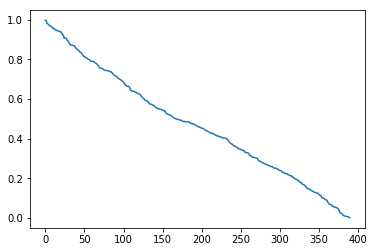

In [26]:
plt.plot(sorted(p_val,reverse=True))
plt.show()

In [27]:
import fnmatch

In [28]:
byfeat_pval = np.zeros(len(filled_btc.columns))
for i,feat in enumerate(filled_btc.columns):
    byfeat_pval[i] = p_val[[fnmatch.fnmatch(col, "{}_*".format(feat)) for col in delayed_btc.columns]].mean()

byfeat_pval

array([ 0.50787762,  0.52048139,  0.47187927,  0.40876626,  0.35145055,
        0.45908039,  0.49029675,  0.54680859,  0.45874523,  0.41437544,
        0.45875706,  0.46290625,  0.58251005])

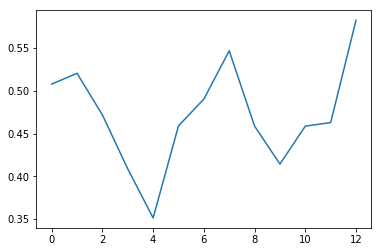

In [29]:
plt.plot(byfeat_pval)
plt.show()

In [30]:
bydel_pval = np.zeros(frame_length)
for i in range(frame_length):
    bydel_pval[i] = p_val[[fnmatch.fnmatch(col, "*_{}".format(i).format(feat)) for col in delayed_btc.columns]].mean()

bydel_pval

array([ 0.42098287,  0.55382425,  0.46564525,  0.51578312,  0.62186159,
        0.62275416,  0.57416528,  0.55147469,  0.48285698,  0.38294798,
        0.38068524,  0.2985186 ,  0.30493582,  0.37087446,  0.31049751,
        0.45557009,  0.45895954,  0.4242635 ,  0.54001754,  0.53983806,
        0.59716668,  0.5744793 ,  0.50853823,  0.47699355,  0.43954312,
        0.41528911,  0.29508058,  0.47217615,  0.62806181,  0.47144923])

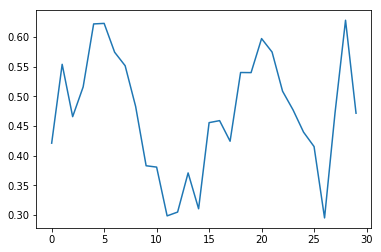

In [165]:
plt.plot(bydel_pval)
plt.show()